In [35]:
import numpy as np
import matplotlib.pyplot as plt
import segyio
from gst_dip import *


## Read Data

In [36]:
filename = './data/volve10r12-full-twt-sub3d.sgy'

In [37]:
with segyio.open(filename) as f:
    data = segyio.tools.cube(f)
    inline_data = f.iline
    crossline_data = f.xline
    inlines = f.ilines
    crosslines = f.xlines
    twt = f.samples
    sample_rate = segyio.tools.dt(f) / 1000
    print('Inline range from', inlines[0], 'to', inlines[-1])
    print('Crossline range from', crosslines[0], 'to', crosslines[-1])
    print('TWT from', twt[0], 'to', twt[-1])   
    print('Sample rate:', sample_rate, 'ms')
    clip_percentile = 99
    vm = np.percentile(data, clip_percentile)

f'The {clip_percentile}th percentile is {vm:.0f}; the max amplitude is {data.max():.0f}'

Inline range from 10090 to 10150
Crossline range from 2150 to 2351
TWT from 4.0 to 3400.0
Sample rate: 4.0 ms


'The 99th percentile is 5; the max amplitude is 30'

In [38]:
inlines[:10]

array([10090, 10091, 10092, 10093, 10094, 10095, 10096, 10097, 10098,
       10099], dtype=int32)

In [39]:
crosslines[:10]

array([2150, 2151, 2152, 2153, 2154, 2155, 2156, 2157, 2158, 2159],
      dtype=int32)

## Slice seismic cube and display it

In [40]:
from seis_util import *

help(slicing)


Help on function slicing in module seis_util:

slicing(cube, type, loc, a_line)
    Slicing a seismic cube to inline section, crossline section, or timeslice section
    
    Input:
    
    cube: 3d numpy array, data (output of segyio read)
    type: 'il' for inline slicing, 'xl' for xline slicing, 'ts' for time slicing
    loc: the location of inline, crossline, or timeslice depends on the type
         you're choosing (integer/float)
    a_line: array of inline, crossline, and timeslice locations, depends on the 
            type you're choosing (1D numpy array)



In [41]:
help(display_slice)


Help on function display_slice in module seis_util:

display_slice(slices, type, b_line, c_line, cmap, vmin, vmax)
    Display the slice
    
    Input:
    
    slices: the slice data, 2D numpy array
    type: 'il' for inline slicing, 'xl' for xline slicing, 'ts' for time slicing
    b_line, c_line: array of inline, crossline, and timeslice, depends on the 
                    type you're choosing (1D numpy array)
    * for 'il': b_line = crossline array, c_line = twt array
    * for 'xl': b_line = inline array, c_line = twt array
    * for 'ts': b_line = inline array, c_line = crossline array
    
    cmap: matplotlib pyplot colormaps ('gray', 'RdBu', 'seismic', 
          jet, Accent, ...)
    vmin, vmax: the minimum and maximum range for colormap. Many options:
    * None, None: normal and default plotting
    * specified vmin, vmax (e.g. vmin = 0, vmax = 1000)
    * vmin = -percentile99, vmax = +percentile99, percentiles of the cube



In [8]:
print(inlines[:10])
print(crosslines[:10])
print(twt[:10])

[10090 10091 10092 10093 10094 10095 10096 10097 10098 10099]
[2150 2151 2152 2153 2154 2155 2156 2157 2158 2159]
[ 4.  8. 12. 16. 20. 24. 28. 32. 36. 40.]


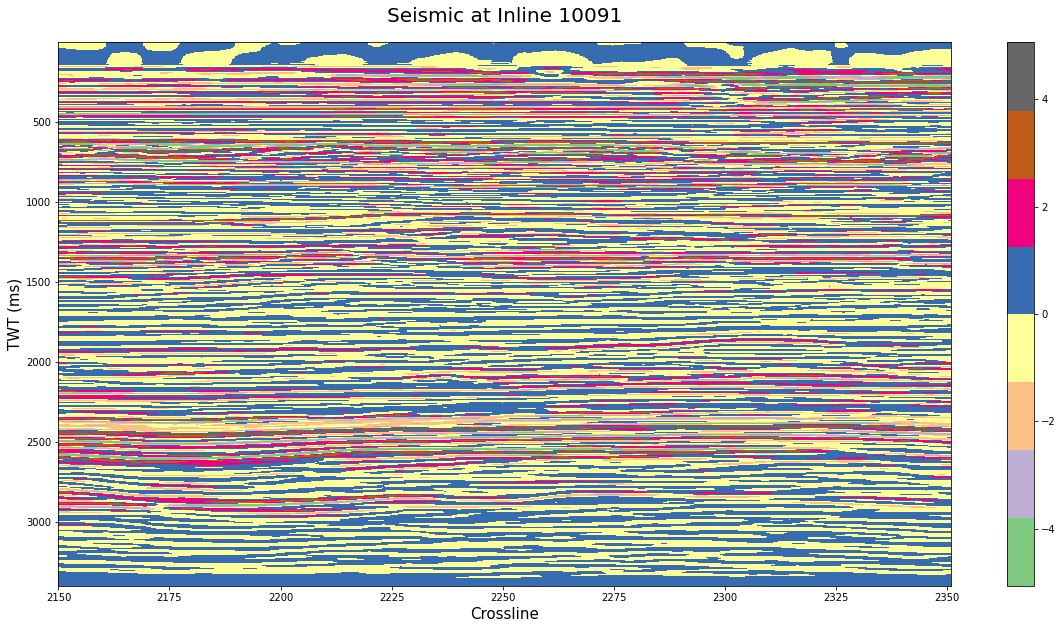

In [9]:
inline_number = 10091

slices = slicing(data, 'il', inline_number, inlines)

plt.figure(figsize=(20,10))
display_slice(slices, 'il', crosslines, twt, 'Accent', -vm, vm) # call function
plt.title('Seismic at Inline {}'.format(inline_number), size=20, pad=20)
plt.xlabel('Crossline', size=15); plt.ylabel('TWT (ms)', size=15)
plt.show()

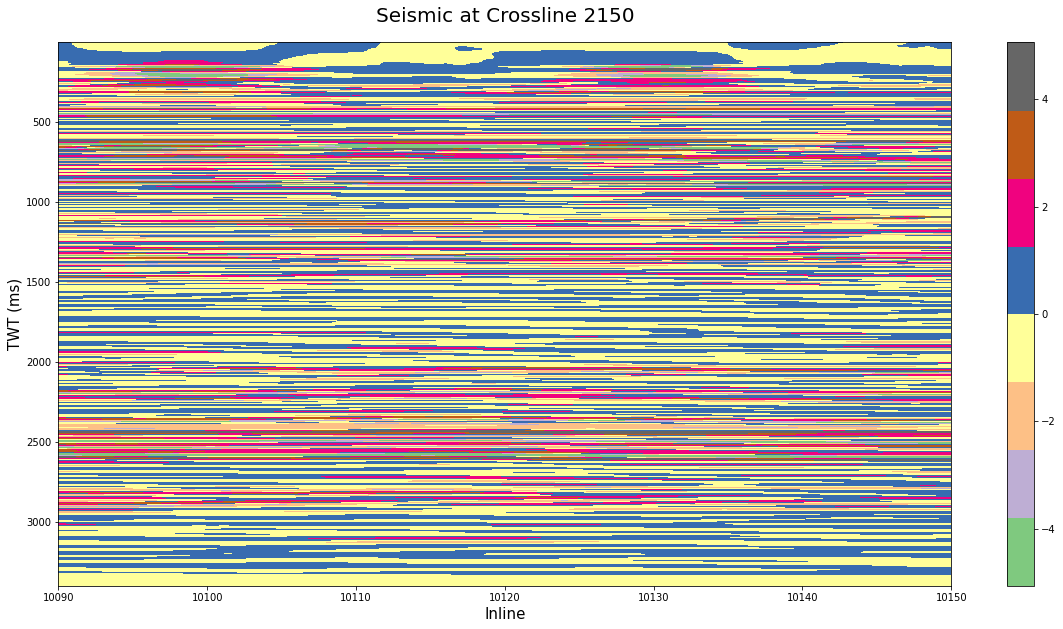

In [10]:
xline_number = 2150

slices = slicing(data, 'xl', xline_number, crosslines)

plt.figure(figsize=(20,10))
display_slice(slices, 'xl', inlines, twt, 'Accent', -vm, vm) # call function
plt.title('Seismic at Crossline {}'.format(xline_number), size=20, pad=20)
plt.xlabel('Inline', size=15); plt.ylabel('TWT (ms)', size=15)
plt.show()

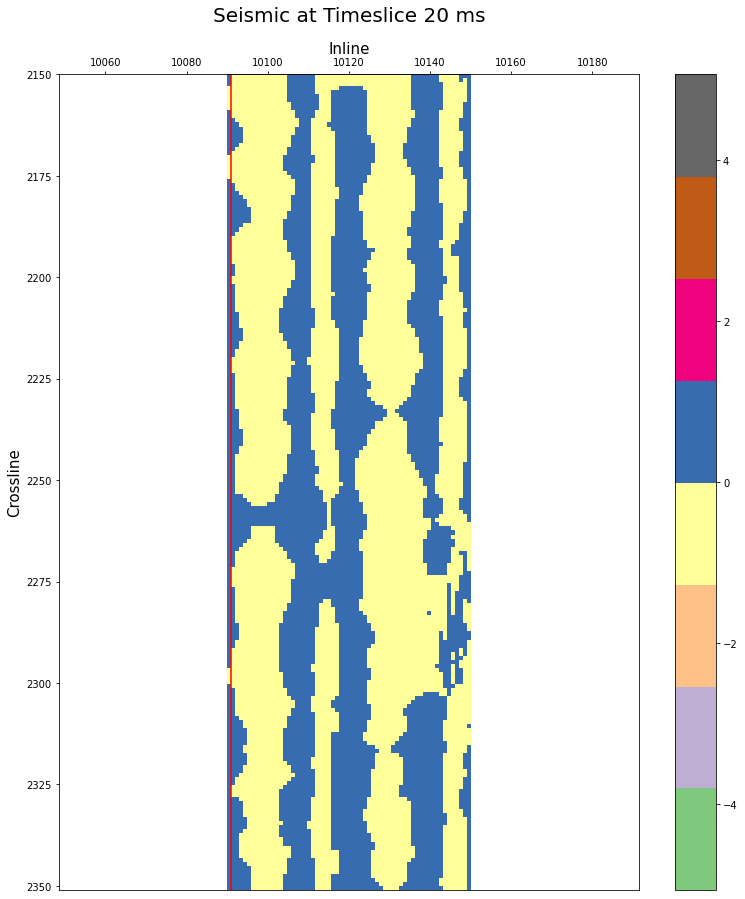

In [11]:
timeslice = 20 # ms

slices = slicing(data, 'ts', timeslice, twt)

slices.shape

plt.figure(figsize=(13,15))
display_slice(slices, 'ts', inlines, crosslines, 'Accent', -vm, vm) # call function
plt.title('Seismic at Timeslice {} ms'.format(timeslice), size=20, pad=20)
plt.plot([inline_number, inline_number], [min(crosslines), max(crosslines)], color='red')
plt.plot([min(inlines), max(inlines)], [xline_number, xline_number], color='black')
plt.xlabel('Inline', size=15); plt.ylabel('Crossline', size=15)
plt.gca().xaxis.set_ticks_position('top') # axis on top
plt.gca().xaxis.set_label_position('top') # label on top
plt.axis('equal')
plt.show()

## 2D Slice

In [12]:
# slice the data at inline 300
inline_number = 10
slices = data[(inline_number+1),:,:]
slices.shape

(202, 850)

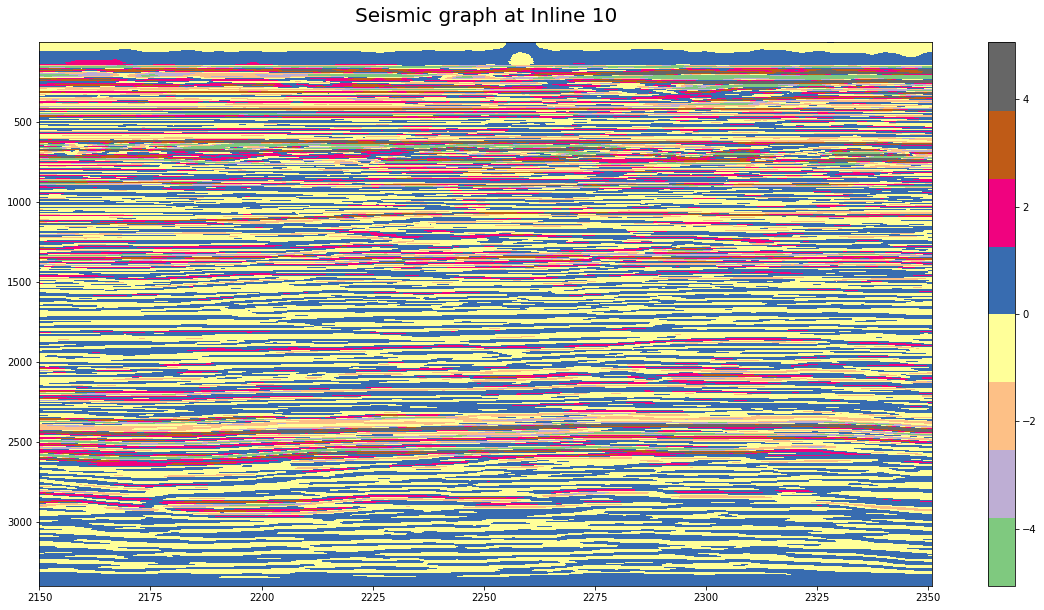

In [13]:
plt.figure(figsize=(20,10))
extent = [crosslines[0], crosslines[-1], twt[-1], twt[0]]
p1 = plt.imshow(slices.T, vmin=-vm, vmax=vm, aspect='auto', extent=extent, cmap='Accent')
plt.title('Seismic graph at Inline {}'.format(inline_number), size=20, pad=20)
plt.colorbar(p1)
plt.show()

## Frequency of 2D Slice

In [14]:
help(frequency_spectrum)


Help on function frequency_spectrum in module seis_util:

frequency_spectrum(data, type='il', inline_array=None, xline_array=None, timeslice_array=None, sample_rate=0.004)
    Compute the frequency spectrum of the whole cube, inline, or crossline
    cube
    (Copyright, Y. Nuwara, ign.nuwara97@gmail.com)
    
    Input:
    
    data: if you choose 'whole', data must be in 3D numpy array, if you choose
          either 'il' or 'xl', data must be in 2D numpy array (you should make
          the slice first using 'slicing' function)
    type: 'whole' for the whole cube, 'il' for inline section, 'xl' for
          crossline section 
    
    inline_array (inline), xline_array (xline), timeslice_array (time) 
    sample_rate: sampling rate of seismic data (in second) 
    
    Output:
    
    freq_seis: frequency
    spec_seis: seismic amplitude



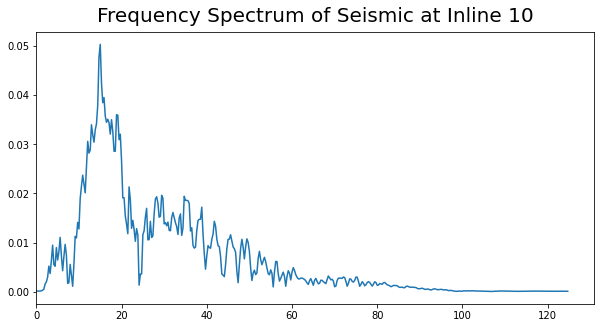

In [15]:
# transpose the slice 
transp_slice = np.transpose(slices)

# take the average of each individual crossline traces in inline slice 

# time
min_time = 0
max_time = len(twt)

# crosslines
xmin = 0
xmax = len(crosslines)

trace = np.mean(transp_slice[min_time:max_time, xmin:xmax], axis=1)

Fs_seis = 1 / 0.004  # Seconds.
n_seis = len(trace)
k_seis = np.arange(n_seis)
T_seis = n_seis / Fs_seis
freq_seis = k_seis / T_seis
freq_seis_il = freq_seis[range(n_seis//2)]  # One side frequency range.

spec_seis = np.fft.fft(trace) / n_seis  # FFT computing and normalization.
spec_seis = spec_seis[range(n_seis//2)]

# This is to smooth the spectrum over a window of 10.
roll_win = np.ones(10) / 10
spec_seis_il = np.convolve(spec_seis, roll_win, mode='same')

plt.figure(figsize=(10,5))
plt.plot(freq_seis_il, np.abs(spec_seis_il))
plt.xlim(xmin=0)
plt.title('Frequency Spectrum of Seismic at Inline {}'.format(inline_number), size=20, pad=10)
plt.show()


In [16]:
transp_slice.shape


(850, 202)

## Frequency Spectrum of the Whole 3D cube¶


In [17]:
slices.T.shape


(850, 202)

In [18]:
transp_cube = np.transpose(data)
transp_cube.shape

(850, 202, 61)

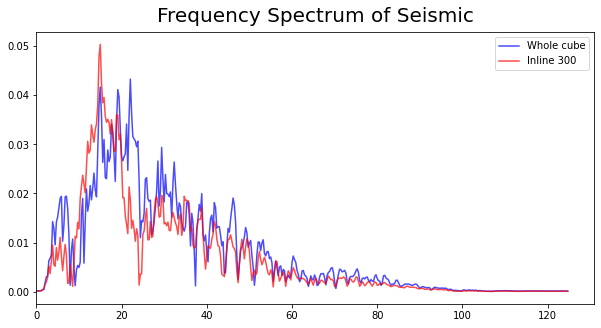

In [19]:
# transpose the cube
transp_cube = np.transpose(data)

# time
min_time = 0
max_time = len(twt)

# crosslines
xmin = 0
xmax = len(crosslines)

# inlines
ymin = 0
ymax = len(inlines)

mean_xl_traces = [] # mean of crossline traces of each inline section

for i in range(len(inlines)):
  mean_xl = np.mean(transp_cube[min_time:max_time, xmin:xmax, i], axis=1)
  mean_xl_traces.append(mean_xl)

transp_xl = np.transpose(mean_xl_traces)

# take average of each individual mean values of xl in the inline section

trace = np.mean(transp_slice[min_time:max_time, ymin:ymax], axis=1)

Fs_seis = 1 / 0.004  # Seconds.
n_seis = len(trace)
k_seis = np.arange(n_seis)
T_seis = n_seis / Fs_seis
freq_seis = k_seis / T_seis
freq_seis_whole = freq_seis[range(n_seis//2)]  # One side frequency range.

spec_seis = np.fft.fft(trace) / n_seis  # FFT computing and normalization.
spec_seis = spec_seis[range(n_seis//2)]

# This is to smooth the spectrum over a window of 10.
roll_win = np.ones(10) / 10
spec_seis_whole = np.convolve(spec_seis, roll_win, mode='same')

plt.figure(figsize=(10,5))
plt.plot(freq_seis_whole, np.abs(spec_seis_whole), color='blue', alpha=.7, label='Whole cube')
plt.plot(freq_seis_il, np.abs(spec_seis_il), color='red', alpha=.7, label='Inline 300')
plt.xlim(xmin=0)
plt.title('Frequency Spectrum of Seismic', size=20, pad=10)
plt.legend()
plt.show()

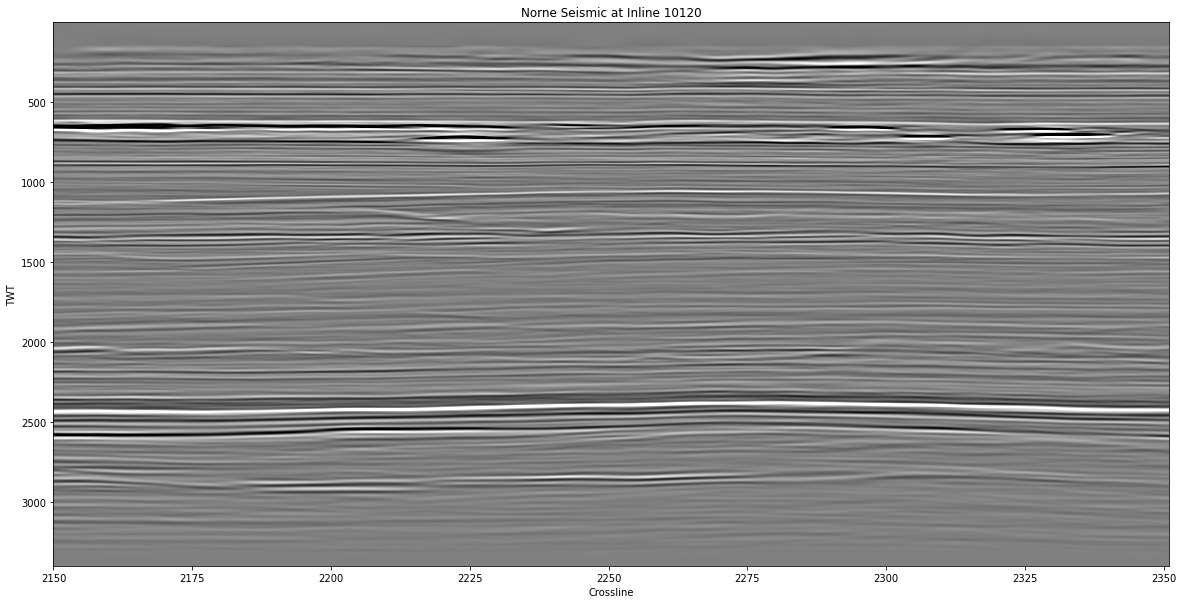

In [20]:
"""
Interactive seismic viewer

Input:

data, inlines, crosslines, twt, sample_rate, vm: output from segyio.read
data: the whole cube (3D numpy array)
inlines: inline locations (1D numpy array)
crosslines: crossline locations (1D numpy array)
twt: two-way travel time (1D numpy array)
sample_rate: sampling rate (float)
vm: 99th percentile of data

"""

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, ToggleButtons
import ipywidgets as widgets
import segyio

type = ToggleButtons(description='Selection',options=['Inline','Crossline',
                                                      'Timeslice'])
cmap_button = ToggleButtons(description='Colormaps',options=['gray','seismic',
                                                             'RdBu','PuOr'])

@interact

def seis_widget(type=type, inline_loc=(min(inlines), max(inlines), 5), 
                xline_loc=(min(crosslines), max(crosslines), 5),
                timeslice_loc=(min(twt), max(twt), sample_rate), 
                cmap=cmap_button):

  if type == 'Inline':

    with segyio.open(filename) as f: 
        inline_slice = f.iline[inline_loc]  

        plt.figure(figsize=(20, 10))
        plt.title('Norne Seismic at Inline {}'.format(inline_loc))
        extent = [crosslines[0], crosslines[-1], twt[-1], twt[0]]

        p1 = plt.imshow(inline_slice.T, cmap=cmap, aspect='auto', extent=extent,
                        vmin=-vm, vmax=vm, interpolation='bicubic')

        plt.xlabel('Crossline'); plt.ylabel('TWT')
        plt.show()

  if type == 'Crossline':

    with segyio.open(filename) as f:
        xline_slice = f.xline[xline_loc]  

        plt.figure(figsize=(20, 10))
        plt.title('Norne Seismic at Crossline {}'.format(xline_loc))
        extent = [inlines[0], inlines[-1], twt[-1], twt[0]]

        p1 = plt.imshow(xline_slice.T, cmap=cmap, aspect='auto', extent=extent, 
                        vmin=-vm, vmax=vm, interpolation='bicubic')

        plt.xlabel('Inline'); plt.ylabel('TWT')
        plt.show()
  
  if type == 'Timeslice':

    id = np.where(twt == timeslice_loc)[0][0]
    tslice = data[:,:,id]

    plt.figure(figsize=(7,10))
    plt.title('Norne Seismic at Timeslice {} ms'.format(timeslice_loc))
    extent = [inlines[0], inlines[-1], crosslines[-1], crosslines[0]]

    p1 = plt.imshow(tslice.T, cmap=cmap, aspect='auto', extent=extent, 
                    vmin=-vm, vmax=vm, interpolation='bicubic')


    plt.xlabel('Inline'); plt.ylabel('Crossline')
    plt.gca().xaxis.set_ticks_position('top') # axis on top
    plt.gca().xaxis.set_label_position('top') # label on top
    plt.xlim(min(inlines), max(inlines))
    plt.ylim(min(crosslines), max(crosslines))
    plt.axis('equal')
    plt.show()

## Timeslice Attributes

In [21]:
twt[:10]

array([ 4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.])

In [22]:
## Time sample incremented by 4 ms

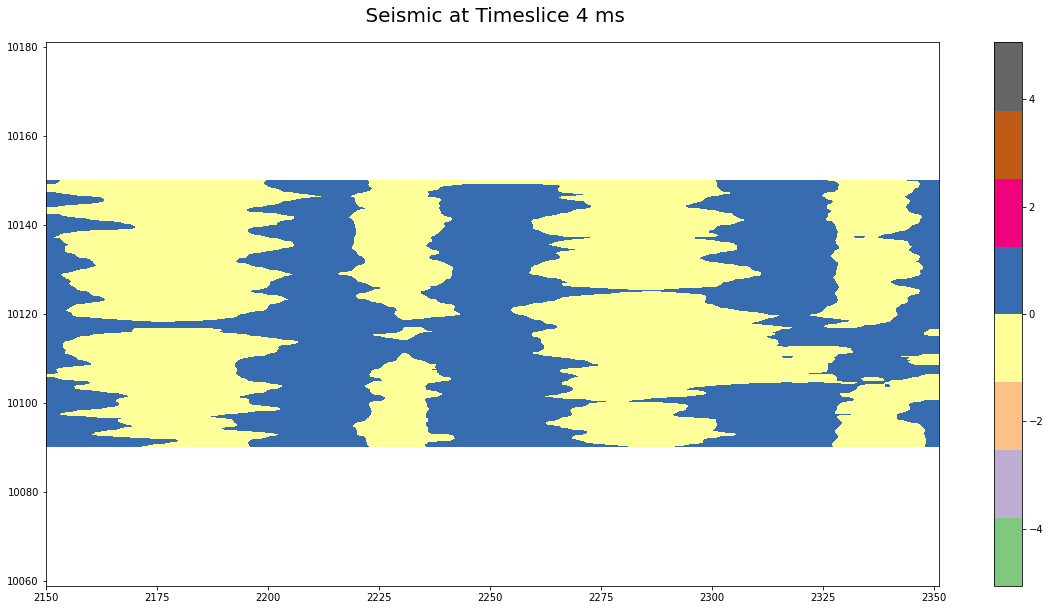

In [23]:
# choose timeslice in ms
tslice = 4

# find index
tslice_id = np.where(twt == tslice)[0][0]

# slicing data
timeslice = data[:,:,(tslice_id + 1)]

# display timeslice 
plt.figure(figsize=(20,10))
extent = [crosslines[0], crosslines[-1], inlines[0], inlines[-1]]
p1 = plt.imshow(timeslice.T, vmin=-vm, vmax=vm, aspect='auto', extent=extent, cmap='Accent')
plt.title(' Seismic at Timeslice {} ms'.format(tslice), size=20, pad=20)
plt.colorbar(p1)
plt.axis('equal')
plt.show()

In [24]:
data.shape

(61, 202, 850)

## Read Data 2D

In [25]:
import segyio

with segyio.open(filename) as f:
  print('Inline range from', min(f.ilines), 'to', max(f.ilines))
  print('Crossline range from', min(f.xlines), 'to', max(f.xlines)) 
  data = segyio.tools.cube(f)
  clip_percentile = 99
  vm = np.percentile(data, clip_percentile)

  inlines = f.ilines
  crosslines = f.xlines
  twt = f.samples

f'The {clip_percentile}th percentile is {vm:.0f}; the max amplitude is {data.max():.0f}'

Inline range from 10090 to 10150
Crossline range from 2150 to 2351


'The 99th percentile is 5; the max amplitude is 30'

## Interactive 2D

In [26]:
def seis_interact(cube=data, type='il', il_loc=400, xl_loc=1000, twt_loc=1404,
                  il_array=inlines, xl_array=crosslines, twt_array=twt, 
                  cmap='gray', vmin=-vm, vmax=vm):
  """
  Interactive seismic viewer
  """

  if type == 'il':
    a_line = il_array
    b_line = xl_array
    c_line = twt_array
    loc = il_loc

  if type == 'xl':
    a_line = xl_array
    b_line = il_array
    c_line = twt_array
    loc = xl_loc

  if type == 'ts':
    a_line = twt_array
    b_line = il_array
    c_line = xl_array
    loc = twt_loc

  slices = slicing(cube, type, loc, a_line)
  display_slice(slices, type, b_line, c_line, cmap, vmin, vmax)

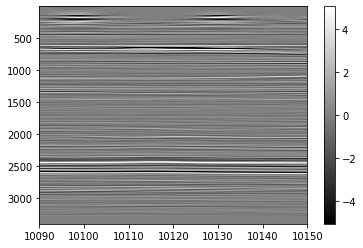

In [27]:
seis_interact(cube=data, type='xl', il_loc=10090, xl_loc=2150, twt_loc=1208, 
              il_array=inlines, xl_array=crosslines, twt_array=twt, 
              cmap='gray', vmin=-vm, vmax=vm)

In [28]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, ToggleButtons
import ipywidgets as widgets

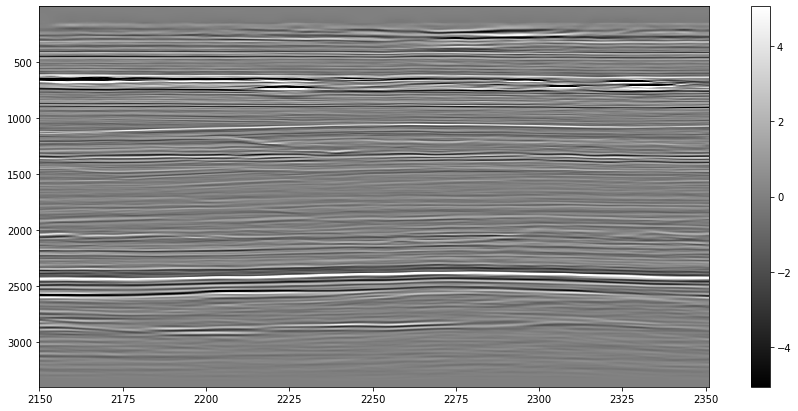

In [29]:
cmap_button = ToggleButtons(description='cmap',options=['gray','seismic','RdBu','PuOr'])

@interact

def seis_widget(type='il', il_loc=(min(inlines), max(inlines)), 
                xl_loc=(min(crosslines), max(crosslines)), 
                twt_loc=(min(twt), max(twt), 4),
                cmap=cmap_button):
  """
  Interactive seismic viewer
  """

  if type == 'il':
    a_line = inlines
    b_line = crosslines
    c_line = twt
    loc = il_loc

  if type == 'xl':
    a_line = crosslines
    b_line = inlines
    c_line = twt
    loc = xl_loc

  if type == 'ts':
    a_line = twt
    b_line = inlines
    c_line = crosslines
    loc = twt_loc

  slices = slicing(data, type, loc, a_line)
  plt.figure(figsize=(15,7))
  display_slice(slices, type, b_line, c_line, cmap, -vm, vm)

## Read Data 3D

In [42]:
import segyio

with segyio.open(filename) as f:

  data = segyio.tools.cube(f)
  inline_data = f.iline
  crossline_data = f.xline

  inlines = f.ilines
  crosslines = f.xlines
  twt = f.samples
  sample_rate = segyio.tools.dt(f) / 1000
  print('Inline range from', inlines[0], 'to', inlines[-1])
  print('Crossline range from', crosslines[0], 'to', crosslines[-1])
  print('TWT from', twt[0], 'to', twt[-1])   
  print('Sample rate:', sample_rate, 'ms')

  clip_percentile = 99
  vm = np.percentile(data, clip_percentile)

f'The {clip_percentile}th percentile is {vm:.0f}; the max amplitude is {data.max():.0f}'

Inline range from 10090 to 10150
Crossline range from 2150 to 2351
TWT from 4.0 to 3400.0
Sample rate: 4.0 ms


'The 99th percentile is 5; the max amplitude is 30'

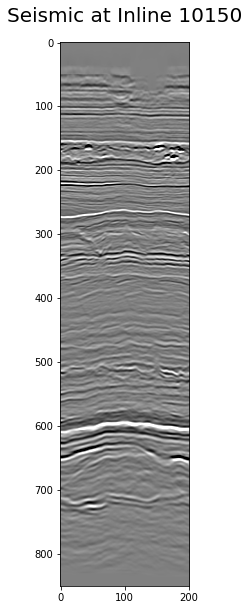

In [43]:
with segyio.open(filename) as f:
    inline_number = 10150
    inline_slice = f.iline[inline_number]   
    plt.figure(figsize=(20, 10))
    plt.title('Seismic at Inline {}'.format(inline_number), size=20, pad=20)
    plt.imshow(inline_slice.T, cmap="gray", vmin=-vm, vmax=vm) # other cmap = "RdBu"
    plt.show()

## Interactive 3D

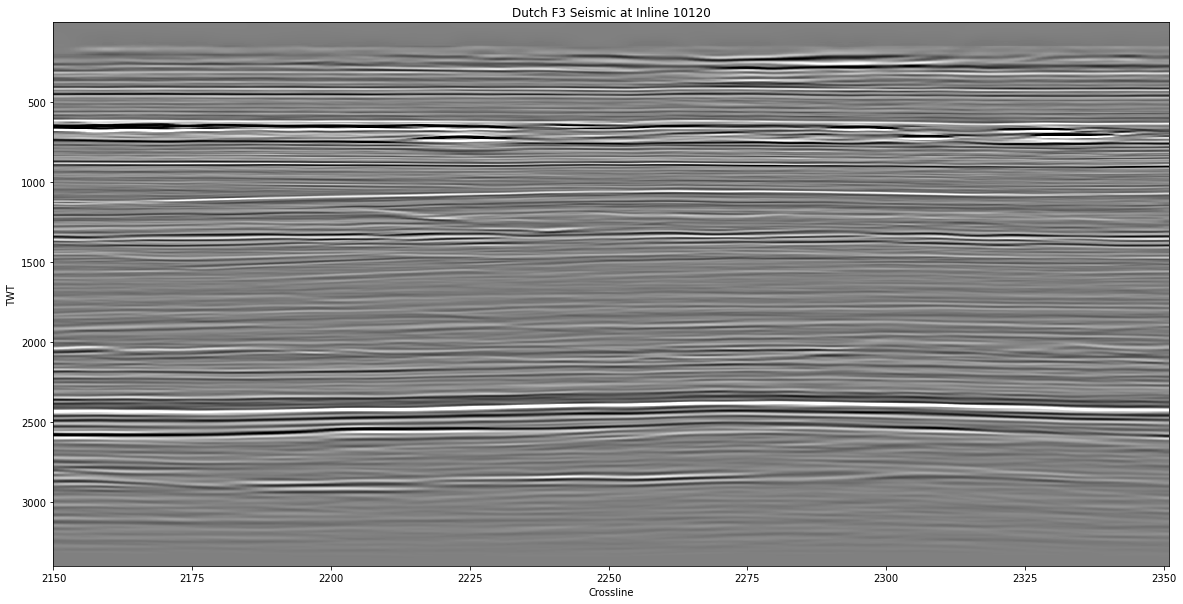

In [44]:

"""
Interactive seismic viewer (example: Dutch F3 Data)

Input:

data, inlines, crosslines, twt, sample_rate, vm: output from segyio.read
data: the whole cube (3D numpy array)
inlines: inline locations (1D numpy array)
crosslines: crossline locations (1D numpy array)
twt: two-way travel time (1D numpy array)
sample_rate: sampling rate (float)
vm: 99th percentile of data

"""

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, ToggleButtons
import ipywidgets as widgets

type = ToggleButtons(description='Selection',options=['Inline','Crossline',
                                                      'Timeslice'])
cmap_button = ToggleButtons(description='Colormaps',options=['gray','seismic',
                                                             'RdBu','PuOr'])

@interact

def seis_widget(type=type, inline_loc=(min(inlines), max(inlines)), 
                xline_loc=(min(crosslines), max(crosslines)),
                timeslice_loc=(min(twt), max(twt), sample_rate), 
                cmap=cmap_button):

  if type == 'Inline':

    with segyio.open(filename) as f: 
        inline_slice = f.iline[inline_loc]  

        plt.figure(figsize=(20, 10))
        plt.title('Dutch F3 Seismic at Inline {}'.format(inline_loc))
        extent = [crosslines[0], crosslines[-1], twt[-1], twt[0]]

        p1 = plt.imshow(inline_slice.T, cmap=cmap, aspect='auto', extent=extent,
                        vmin=-vm, vmax=vm)

        plt.xlabel('Crossline'); plt.ylabel('TWT')
        plt.show()

  if type == 'Crossline':

    with segyio.open(filename) as f:
        xline_slice = f.xline[xline_loc]  

        plt.figure(figsize=(20, 10))
        plt.title(' Seismic at Crossline {}'.format(xline_loc))
        extent = [inlines[0], inlines[-1], twt[-1], twt[0]]

        p1 = plt.imshow(xline_slice.T, cmap=cmap, aspect='auto', extent=extent, 
                        vmin=-vm, vmax=vm)

        plt.xlabel('Inline'); plt.ylabel('TWT')
        plt.show()
  
  if type == 'Timeslice':

    id = np.where(twt == timeslice_loc)[0][0]
    tslice = data[:,:,id]

    plt.figure(figsize=(7,10))
    plt.title('Dutch F3 Seismic at Timeslice {} ms'.format(timeslice_loc))
    extent = [inlines[0], inlines[-1], crosslines[-1], crosslines[0]]

    p1 = plt.imshow(tslice.T, cmap=cmap, aspect='auto', extent=extent, 
                    vmin=-vm, vmax=vm)


    plt.xlabel('Inline'); plt.ylabel('Crossline')
    plt.gca().xaxis.set_ticks_position('top') # axis on top
    plt.gca().xaxis.set_label_position('top') # label on top
    plt.xlim(min(inlines), max(inlines))
    plt.ylim(min(crosslines), max(crosslines))
    plt.axis('equal')
    plt.show()

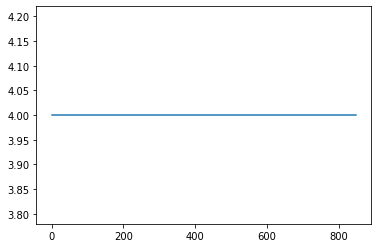

In [33]:
twts = [j-i for i,j in zip(twt[:-1], twt[1:])]
arr = np.arange(len(twts))

plt.plot(arr, twts)

## seis_attribute

In [46]:
def attribute_2d(cube, type='il', inline_loc=400, xline_loc=1000, 
                 timeslice_loc=1404, attribute_class='DipAzm', 
                 attribute_type='gstdip3d', kernel=None, sample_rate=4, 
                 dip_factor=10, axis=-1):
  """
  Computing attribute of a 3D cube, output a 2D attribute slice 

  Input:

  cube: 3D seismic data output of segyio.tools.cube (3D numpy array)
  type: specify the type of slice
    * 'il' for inline
    * 'xl' for crossline
    * 'ts' for timeslice)
  inline_loc: preferred location of inline, if you specify type='il', 
              no need to input xline_loc, timeslice_loc
  xline_loc: preferred location of crossline, if you specify type='xl', 
             no need to input inline_loc, timeslice_loc
  timeslice_loc: preferred location of timeslice, if you specify type='ts', 
                 no need to input inline_loc, xline_loc
  
  attribute_class: specify the class of attribute (string)

    * 'DipAzm': dip and azimuth attributes

  attribute_type: specify the attribute type (string). 
  
 
  Each class has different attribute types, as follows.

   

    * For class 'DipAzm', attributes are: 
      * 'dipgrad': gradient dips from inline, crossline, and z-gradients 
      * 'gst': the gradient structure tensors (GST), inner product of 
        gradients.
      * 'gstdip2d': 2D gradient dips from GST
      * 'gstdip3d': 3D gradient dips from GST
      * 'gstazm3d': 3D azimuth from GST
    
   
  """

  import numpy as np
  import segyio
  from SignalProcess import SignalProcess

  # slicing the 3D cube based on inline, crossline, or timeslice selection
  # processing input to attribute computation 

  if type == 'il':
    with segyio.open(filename) as f: 
        slices = f.iline[inline_loc]  

    darray = np.reshape(slices, slices.shape + (1,))

  if type == 'xl':
    with segyio.open(filename) as f:
        slices = f.xline[xline_loc] 

    darray = np.reshape(slices, slices.shape + (1,))  
  
  if type == 'ts':
    id = np.where(twt == timeslice_loc)[0][0]
    slices = data[:,:,id]

    darray = np.reshape(np.transpose(slices), (np.transpose(slices)).shape + (1,))
  
  # attribute computation

  
  if attribute_class == 'DipAzm':
    x = DipAzm()
    darray, chunks_init = DipAzm.create_array(x, darray, kernel=None, preview=None)
    darray = darray.T

    if attribute_type == 'dipgrad':
      il_dip, xl_dip = DipAzm.gradient_dips(x, darray, dip_factor=10, kernel=(3,3,3), preview=None)

    if attribute_type == 'gst':
      gi2, gj2, gk2, gigj, gigk, gjgk = DipAzm.gradient_structure_tensor(x, darray, kernel, preview=None)
    
    if attribute_type == 'gstdip2d':
      il_dip, xl_dip = DipAzm.gst_2D_dips(x, darray, dip_factor=10, kernel=(3,3,3), preview=None)

    if attribute_type == 'gstdip3d':
      result = DipAzm.gst_3D_dip(x, darray, dip_factor=1, kernel=(3,3,3), preview=None)

    if attribute_type == 'gstazm3d':
      result = DipAzm.gst_3D_azm(x, darray, dip_factor=10, kernel=(3,3,3), preview=None)


  
  # return(result, il_dip, xl_dip, gi2, gj2, gk2, gigj, gigk, gjgk, H, K, Kmax, Kmin, KMPos, KMNeg)
  return(result)

In [45]:
help(attribute_2d)


Help on function attribute_2d in module __main__:

attribute_2d(cube, type='il', inline_loc=400, xline_loc=1000, timeslice_loc=1404, attribute_class='DipAzm', attribute_type='gstdip3d', kernel=None, sample_rate=4, dip_factor=10, axis=-1)
    Computing attribute of a 3D cube, output a 2D attribute slice 
    
    Input:
    
    cube: 3D seismic data output of segyio.tools.cube (3D numpy array)
    type: specify the type of slice
      * 'il' for inline
      * 'xl' for crossline
      * 'ts' for timeslice)
    inline_loc: preferred location of inline, if you specify type='il', 
                no need to input xline_loc, timeslice_loc
    xline_loc: preferred location of crossline, if you specify type='xl', 
               no need to input inline_loc, timeslice_loc
    timeslice_loc: preferred location of timeslice, if you specify type='ts', 
                   no need to input inline_loc, xline_loc
    
    attribute_class: specify the class of attribute (string)
    
      * 'DipAzm'

## Test Class Amplitude Attributes

## First Derivative

## Inline

In [47]:
result = attribute_2d(cube=data, type='il', inline_loc=10090, attribute_class='DipAzm', attribute_type='gstdip3d')
result

dask.array<where, shape=(1, 850, 202), dtype=float32, chunksize=(1, 201, 201), chunktype=numpy.ndarray>

In [50]:
dir(result)

['A',
 'T',
 '_Array__chunks',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_function__',
 '__array_priority__',
 '__array_ufunc__',
 '__await__',
 '__bool__',
 '__class__',
 '__complex__',
 '__dask_graph__',
 '__dask_keys__',
 '__dask_layers__',
 '__dask_optimize__',
 '__dask_postcompute__',
 '__dask_postpersist__',
 '__dask_scheduler__',
 '__dask_tokenize__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__len__',
 '__long__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.023964 to fit


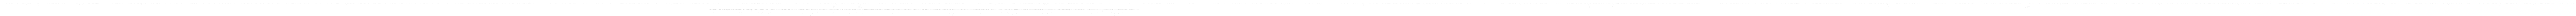

In [52]:
result.visualize()

In [48]:
from seis_util import display_attribute


In [36]:
help(display_attribute)

Help on function display_attribute in module seis_util:

display_attribute(computed_attribute, type, b_line, c_line, cmap, vmin, vmax)
    Processing the output from d2geo attribute for matplotlib display
    
    Input:
    
    computed_attribute: output from the attribute computation (3D Dask array)
    type: 'il' for inline, 'xl' for crossline, 'ts' for timeslice
    
    b_line, c_line: array of inline, crossline, and timeslice, depends on the 
                    type you're choosing (1D numpy array)
    * for 'il': b_line = crossline array, c_line = twt array
    * for 'xl': b_line = inline array, c_line = twt array
    * for 'ts': b_line = inline array, c_line = crossline array
    
    cmap: matplotlib pyplot colormaps ('gray', 'RdBu', 'seismic', 
          jet, Accent, ...)
    vmin, vmax: the minimum and maximum range for colormap. Many options:
    * None, None: normal and default plotting
    * specified vmin, vmax (e.g. vmin = 0, vmax = 1000)
    * vmin = -percentile99, v

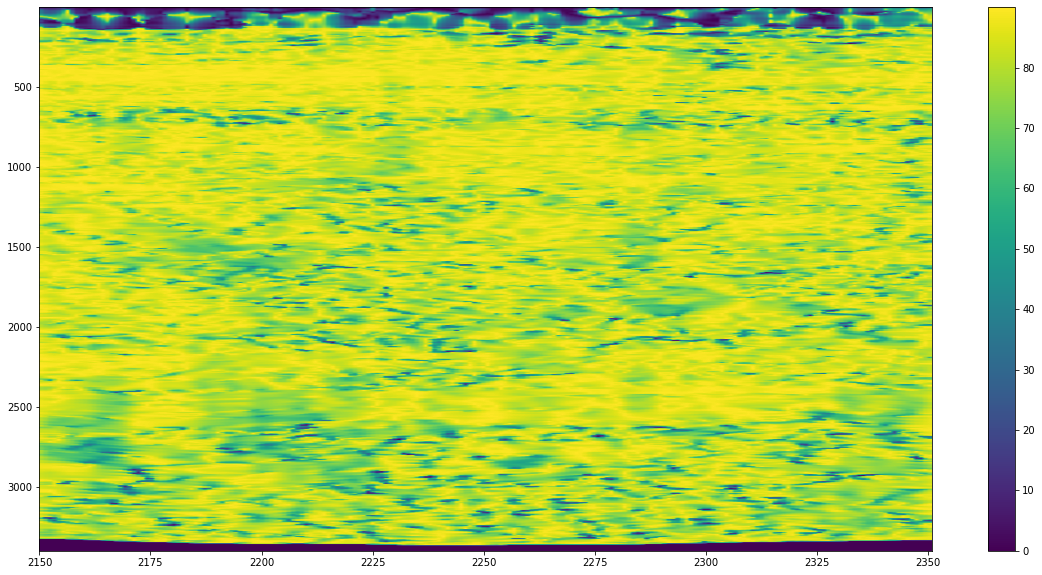

In [49]:
plt.figure(figsize=(20,10))
display_attribute(result, 'il', crosslines, twt, 'viridis', None, None)